In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows",500)

In [3]:
from sklearn.datasets import make_moons

In [4]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [8]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [6]:
data = pd.DataFrame(df)

In [7]:
data

,x1,x2,y
0,-0.848027,0.047288,0
1,0.041428,-0.371309,1
2,-0.352063,0.748185,0
3,1.037046,-0.094283,1
4,1.019970,0.313654,0
...,...,...,...
995,0.480915,-0.316817,1
996,1.768485,-0.258663,1
997,0.095598,0.834844,0
998,0.438987,1.288911,0


<Axes: xlabel='x1', ylabel='x2'>

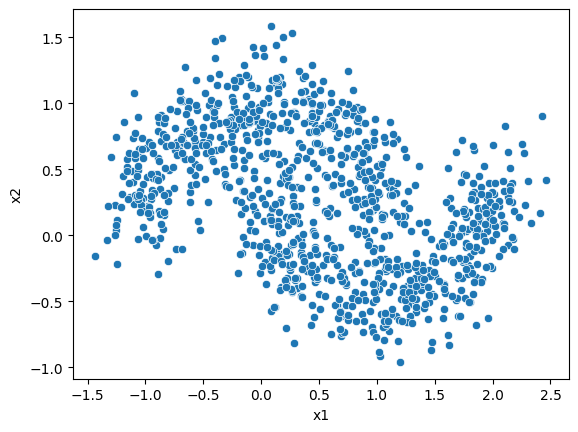

In [30]:
sns.scatterplot(x="x1",y="x2",data=data)

In [9]:
x=data.iloc[:,:-1]
y=data["y"]

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## DecisionTreeClassifier

In [16]:
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(96.39999999999999, 100.0)

## SVC

In [19]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100,sv.score(x_train,y_train)*100

(97.6, 96.39999999999999)

## GaussianNB

In [21]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)*100,gnb.score(x_train,y_train)*100

(87.2, 85.46666666666667)

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
li=[("dt1",DecisionTreeClassifier()),("sv",SVC()),("gnb",GaussianNB())]

In [25]:
vc= VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv', SVC()),
                             ('gnb', GaussianNB())])

In [26]:
vc.score(x_test,y_test)*100,vc.score(x_train,y_train)*100

(97.2, 97.33333333333334)

##  how it works

In [27]:
prd = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test)}

In [28]:
prd

{'dt': array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0], dtype=int64),
 'sv': array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 